In [1]:
import xarray as xr

In [2]:
ds = xr.open_dataset("/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/f.e21.CREDIT_climate.statics_1.0deg_32levs_latlon_F32_hyai_fixed.nc")

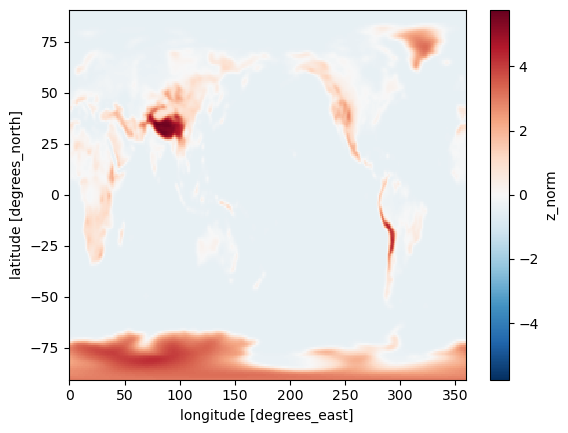

In [6]:
ds.z_norm.plot()

In [9]:
import numpy as np
import torch
t = torch.tensor(np.cos(np.deg2rad(ds["latitude"])).values)

In [19]:
t_expand = t.reshape(1, 1, 1, t.shape[0], 1).expand(4,1,1,t.shape[0], 288)

In [21]:
t_expand.shape

torch.Size([4, 1, 1, 192, 288])

In [17]:
blah = torch.ones(4,2,1,192,288)

In [23]:
torch.cat([blah, t_expand], dim=1).shape

torch.Size([4, 3, 1, 192, 288])

In [24]:
cos_lat = np.cos(np.deg2rad(ds["latitude"])).values
cos_lat = torch.tensor(cos_lat).reshape(1, 1, 1, cos_lat.shape[0], 1).expand(1,1,1,cos_lat.shape[0], 288)

In [25]:
cos_lat.shape

torch.Size([1, 1, 1, 192, 288])

In [26]:
cos_lat.expand(8, *cos_lat.shape[1:]).shape

torch.Size([8, 1, 1, 192, 288])